In [1]:
import os
import pandas as pd


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 22 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 22 days


## Setup images path data frame

In [2]:
src_path, image_type = "../data/JPGs/", ".jpg"
 
image_paths = []  
for root, dirs, files in os.walk(src_path):
    image_paths.extend([os.path.join(root, f) for f in files if f.endswith(image_type)])

image_paths

['../data/JPGs/front.3.400.jpg',
 '../data/JPGs/0/front.10.400.jpg',
 '../data/JPGs/0/front.3.400.jpg',
 '../data/JPGs/0/front.4.400.jpg',
 '../data/JPGs/0/front.6.400.jpg',
 '../data/JPGs/0/front.7.400.jpg',
 '../data/JPGs/0000/front.10.400.jpg',
 '../data/JPGs/0000/front.11.400.jpg',
 '../data/JPGs/0000/front.12.400.jpg',
 '../data/JPGs/0000/front.13.400.jpg',
 '../data/JPGs/0000/front.15.400.jpg',
 '../data/JPGs/0000/front.3.400.jpg',
 '../data/JPGs/0000/front.4.400.jpg',
 '../data/JPGs/0000/front.5.400.jpg',
 '../data/JPGs/0000/front.6.400.jpg',
 '../data/JPGs/0000/front.7.400.jpg',
 '../data/JPGs/0000/front.8.400.jpg',
 '../data/JPGs/0000/front.9.400.jpg',
 '../data/JPGs/00000758/front.9.400.jpg',
 '../data/JPGs/00001373/front.6.400.jpg',
 '../data/JPGs/00002929/front.4.400.jpg',
 '../data/JPGs/00003100/front.3.400.jpg',
 '../data/JPGs/00005487/front.3.400.jpg',
 '../data/JPGs/00007658/front.3.400.jpg',
 '../data/JPGs/00008433/front.3.400.jpg',
 '../data/JPGs/00008761/front.3.400.

In [3]:
image_paths[0].split("JPGs/")[1]

'front.3.400.jpg'

In [4]:
image_names = [image_path.split("JPGs/")[1] for image_path in image_paths]

In [5]:
images_df = pd.DataFrame({'image_names': image_names, 'image_paths': image_paths})
images_df.head()

,image_names,image_paths
0,front.3.400.jpg,../data/JPGs/front.3.400.jpg
1,0/front.10.400.jpg,../data/JPGs/0/front.10.400.jpg
2,0/front.3.400.jpg,../data/JPGs/0/front.3.400.jpg
3,0/front.4.400.jpg,../data/JPGs/0/front.4.400.jpg
4,0/front.6.400.jpg,../data/JPGs/0/front.6.400.jpg


## Merge with features data frame

In [6]:
features_df = pd.read_csv("../data/carbon_footprint_proteins.csv")
features_df.head()

,image_url,carbon_footprint_100g,proteins_100g
0,http://en.openfoodfacts.org/images/products/20...,0.000,1.1
1,NaN,18.756,NaN
2,http://en.openfoodfacts.org/images/products/22...,193.400,3.0
3,http://en.openfoodfacts.org/images/products/22...,198.700,5.0
4,http://en.openfoodfacts.org/images/products/22...,221.600,4.5


In [7]:
"/".join(features_df.image_url[0].split("/")[-2:])

'8898/front.4.400.jpg'

In [8]:
features_df["image_names"] = features_df["image_url"].apply(lambda x: "/".join(str(x).split("/")[-2:]))

In [9]:
features_df.head()

,image_url,carbon_footprint_100g,proteins_100g,image_names
0,http://en.openfoodfacts.org/images/products/20...,0.000,1.1,8898/front.4.400.jpg
1,NaN,18.756,NaN,nan
2,http://en.openfoodfacts.org/images/products/22...,193.400,3.0,22016256/front.12.400.jpg
3,http://en.openfoodfacts.org/images/products/22...,198.700,5.0,22138767/front.11.400.jpg
4,http://en.openfoodfacts.org/images/products/22...,221.600,4.5,22138910/front.12.400.jpg


In [10]:
features_df.dropna(inplace=True)
features_df.head()

,image_url,carbon_footprint_100g,proteins_100g,image_names
0,http://en.openfoodfacts.org/images/products/20...,0.0,1.1,8898/front.4.400.jpg
2,http://en.openfoodfacts.org/images/products/22...,193.4,3.0,22016256/front.12.400.jpg
3,http://en.openfoodfacts.org/images/products/22...,198.7,5.0,22138767/front.11.400.jpg
4,http://en.openfoodfacts.org/images/products/22...,221.6,4.5,22138910/front.12.400.jpg
5,http://en.openfoodfacts.org/images/products/22...,136.0,2.5,22139320/front.4.400.jpg


In [11]:
results_df = features_df.merge(images_df)

In [12]:
if results_df.shape[0] == features_df.shape[0]:
    print 'merge success!'

merge success!


## Generate Image Scatter Plot

In [13]:
from ImageScatterPlot import ImageScatterPlot
import numpy as np

In [14]:
image_paths = ["../data/JPGs/" + image_name for image_name in results_df.image_names]

In [36]:
features = -1*np.array(results_df[["proteins_100g", "carbon_footprint_100g"]])
features[:,0] = -1*features[:,0]

In [37]:
print features.shape
print len(image_paths)

(151, 2)
151


In [38]:
scatterPlot = ImageScatterPlot()

In [39]:
scatterPlot.create_save_fig(image_paths = image_paths, projected_features = features, out_file = "../results/carbon-footprint-proteins.png")

number of images 151


In [24]:
from pylab import *
%matplotlib inline

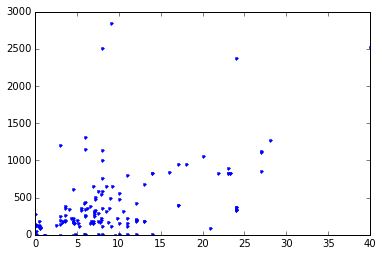

In [43]:
plot(results_df.proteins_100g, results_df.carbon_footprint_100g, '.')

In [40]:
results_df.head()

,image_url,carbon_footprint_100g,proteins_100g,image_names,image_paths
0,http://en.openfoodfacts.org/images/products/20...,0.0,1.1,8898/front.4.400.jpg,../data/JPGs/8898/front.4.400.jpg
1,http://en.openfoodfacts.org/images/products/22...,193.4,3.0,22016256/front.12.400.jpg,../data/JPGs/22016256/front.12.400.jpg
2,http://en.openfoodfacts.org/images/products/22...,198.7,5.0,22138767/front.11.400.jpg,../data/JPGs/22138767/front.11.400.jpg
3,http://en.openfoodfacts.org/images/products/22...,221.6,4.5,22138910/front.12.400.jpg,../data/JPGs/22138910/front.12.400.jpg
4,http://en.openfoodfacts.org/images/products/22...,136.0,2.5,22139320/front.4.400.jpg,../data/JPGs/22139320/front.4.400.jpg


In [44]:
argmax(results_df.carbon_footprint_100g)

138

In [47]:
results_df.iloc[138,:]

image_url                http://en.openfoodfacts.org/images/products/76...
carbon_footprint_100g                                                 2842
proteins_100g                                                            9
image_names                                           4842/front.4.400.jpg
image_paths                              ../data/JPGs/4842/front.4.400.jpg
Name: 138, dtype: object

In [49]:
results_df[["image_paths", "proteins_100g", "carbon_footprint_100g"]].to_csv("/Users/myazdaniUCSD/Desktop/sample_file.csv", index = False)